# Wavy hair detection using CNN 

Authors: LIN Hansheng, ZHONG Zichao

Dataset: CelebA Dataset

Deep learning package: Pytorch

The <b>CelebA dataset</b> encompasses more than 200,000 images capturing celebrity faces, each accompanied by 40 binary attributes per image. These attributes delineate a diverse range of facial features and poses, providing information on aspects such as whether the celebrity is wearing glasses, smiling in the image, or has wavy hair, among others. Within this notebook, our objective is to employ PyTorch to train a convolutional neural network (CNN) for the specific task of <b>detecting wavy hair</b> in the CelebA images.

Our initial step involves loading the images from <b>torchvision.datasets</b>. Subsequently, we will explore various image augmentation techniques that we will apply to our training set. Finally, post-training our CNN, we will assess its performance on previously unseen test images.

In [27]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np

import datetime

## Loading dataset from torchvision:

In [2]:
image_path = './'

celeba_dataset = torchvision.datasets.CelebA(image_path, split='all', target_type='attr', download=True)

1443490838it [00:57, 25148221.88it/s]
26721026it [00:00, 36902719.77it/s]
3424458it [00:00, 29426311.16it/s]
6082035it [00:00, 45168659.33it/s]
12156055it [00:00, 28775339.80it/s]
2836386it [00:00, 30216438.66it/s]


In [3]:
celeba_dataset  # The full celeba_dataset contains 202599 images

Dataset CelebA
    Number of datapoints: 202599
    Root location: ./
    Target type: ['attr']
    Split: all

In [4]:
celeba_dataset[0]  
# Each element of celeb_dataset is a tuple, the first element of which is an image (178x218).
# The second element of the tuple is a tensor (with 40 elements) of binary attributes.

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218>,
 tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
         1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1]))

In [5]:
celeba_dataset.attr_names    # The names of each of the 40 binary attributes can be accessed with attr_names.

['5_o_Clock_Shadow',
 'Arched_Eyebrows',
 'Attractive',
 'Bags_Under_Eyes',
 'Bald',
 'Bangs',
 'Big_Lips',
 'Big_Nose',
 'Black_Hair',
 'Blond_Hair',
 'Blurry',
 'Brown_Hair',
 'Bushy_Eyebrows',
 'Chubby',
 'Double_Chin',
 'Eyeglasses',
 'Goatee',
 'Gray_Hair',
 'Heavy_Makeup',
 'High_Cheekbones',
 'Male',
 'Mouth_Slightly_Open',
 'Mustache',
 'Narrow_Eyes',
 'No_Beard',
 'Oval_Face',
 'Pale_Skin',
 'Pointy_Nose',
 'Receding_Hairline',
 'Rosy_Cheeks',
 'Sideburns',
 'Smiling',
 'Straight_Hair',
 'Wavy_Hair',
 'Wearing_Earrings',
 'Wearing_Hat',
 'Wearing_Lipstick',
 'Wearing_Necklace',
 'Wearing_Necktie',
 'Young',
 '']

In [49]:
celeba_dataset.attr_names[33]   # 'Wavy_Hair' is the 31st attribute. We are interested in only this attribute.

'Wavy_Hair'

## Example images from CelebA dataset:

We should showcase a chosen set of images from the CelebA dataset, presenting a couple of images alongside their corresponding list of attributes.

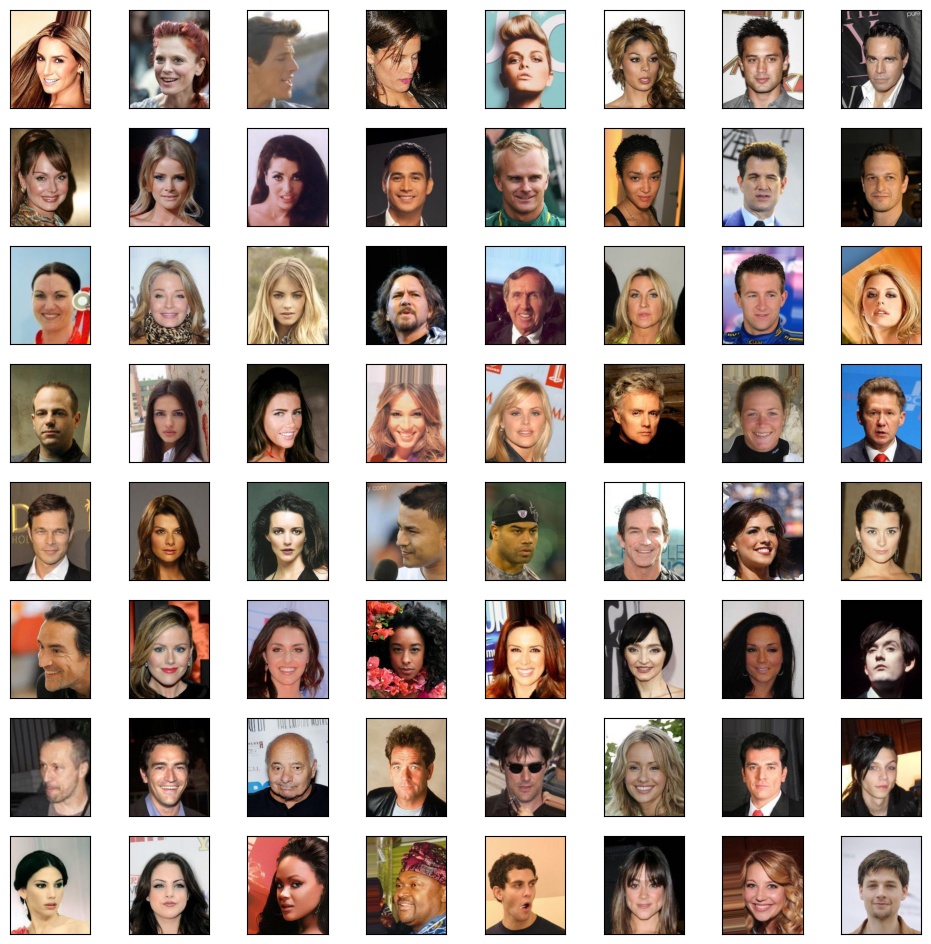

In [52]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
index = 0

for i in range(8):
    for j in range(8):

        axs[i, j].imshow(celeba_dataset[index][0])
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        #axs[i, j].axis('off')
        index += 1


Both of the images presented below possess a smiling attribute with a value of 1, signifying that they have been categorized as having Wavy Hair.

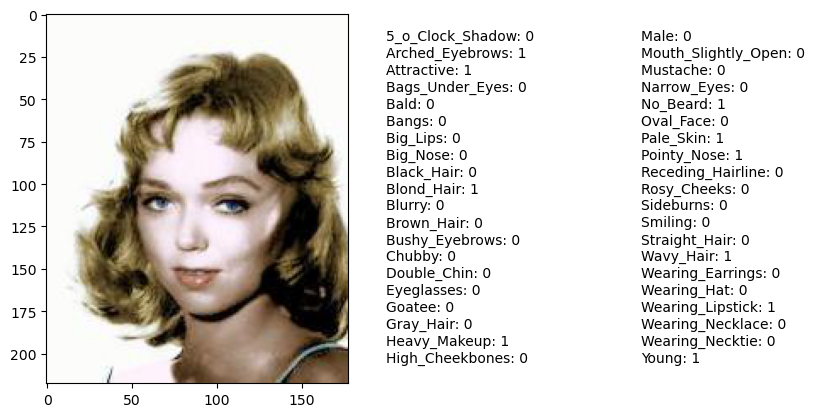

In [86]:
image_idx = -1
plt.imshow(celeba_dataset[image_idx][0])
for i in range(20):
    plt.text(x=200, y=15+10*i, s=f'{celeba_dataset.attr_names[i]}: {celeba_dataset[image_idx][1][i]}')
for i in range(20, 40):
    plt.text(x=350, y=15+10*(i-20), s=f'{celeba_dataset.attr_names[i]}: {celeba_dataset[image_idx][1][i]}')

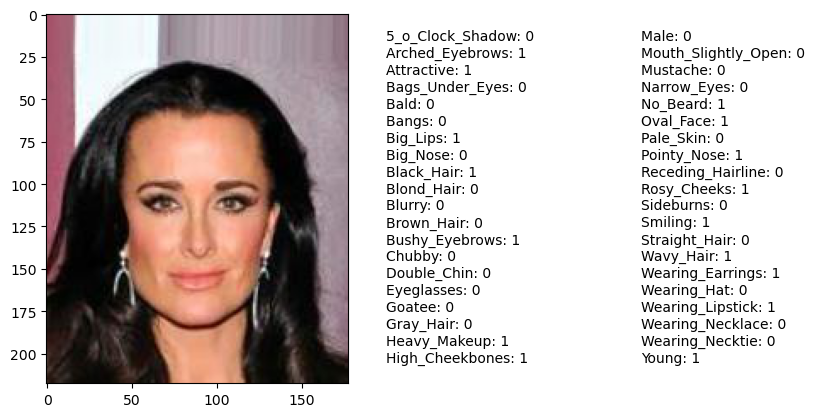

In [87]:
image_idx = -2
plt.imshow(celeba_dataset[image_idx][0])
for i in range(20):
    plt.text(x=200, y=15+10*i, s=f'{celeba_dataset.attr_names[i]}: {celeba_dataset[image_idx][1][i]}')
for i in range(20, 40):
    plt.text(x=350, y=15+10*(i-20), s=f'{celeba_dataset.attr_names[i]}: {celeba_dataset[image_idx][1][i]}')

## Data augmentation:


The incorporation of image augmentation enables the augmentation of our training set by applying transformations to the data. This augmentation proves beneficial in enhancing performance by mitigating overfitting and enhancing the resilience of our model to variations, including image orientation, contrast, and noise. In this context, we will explore five distinct image transformations and implement them using <b>torchvision.transforms</b>:

1. Cropping image to a bounding box
2. Flipping horizontally
3. Adjusting contrast
4. Adjusting brightness
5. Center cropping and resizing

##### 1. Cropping image to a bounding box

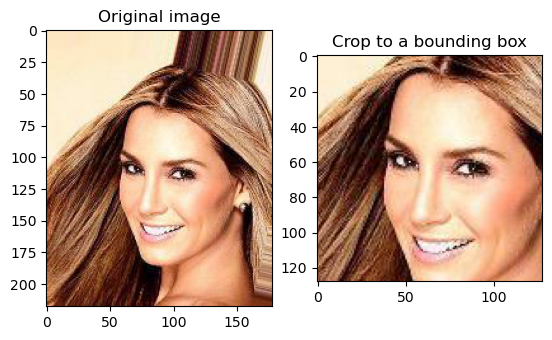

In [88]:
img, att = celeba_dataset[0]
img_cropped = transforms.functional.crop(img, 50, 20, 128, 128)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[0].set_title('Original image')
axs[1].imshow(img_cropped)
axs[1].set_title('Crop to a bounding box')
plt.show()

##### 2. Flipping image horizontally

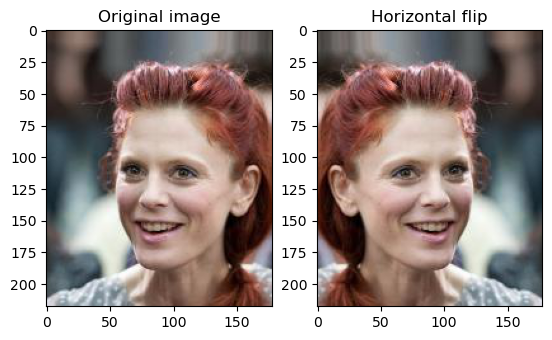

In [89]:
img, att = celeba_dataset[1]
img_cropped = transforms.functional.hflip(img)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[0].set_title('Original image')
axs[1].imshow(img_cropped)
axs[1].set_title('Horizontal flip')
plt.show()

##### 3. Adjusting contrast

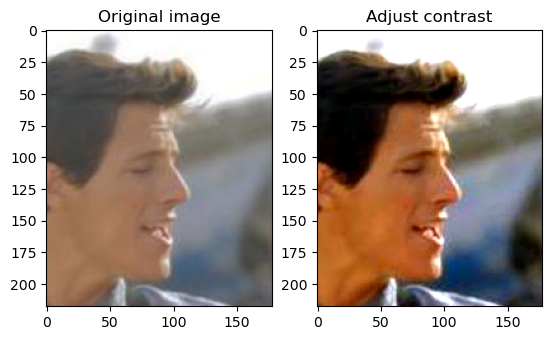

In [90]:
img, att = celeba_dataset[2]
img_cropped = transforms.functional.adjust_contrast(img, contrast_factor=2)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[0].set_title('Original image')
axs[1].imshow(img_cropped)
axs[1].set_title('Adjust contrast')
plt.show()

##### 4. Adjusting brightness

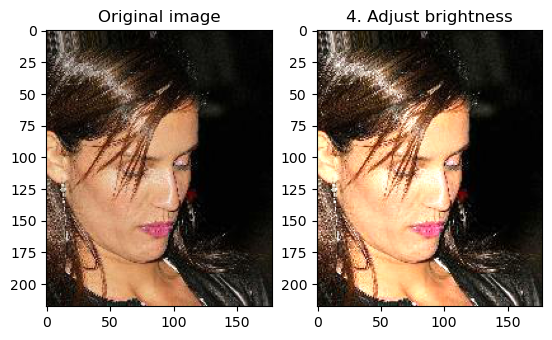

In [91]:
img, att = celeba_dataset[3]
img_cropped = transforms.functional.adjust_brightness(img, brightness_factor=1.3)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[0].set_title('Original image')
axs[1].imshow(img_cropped)
axs[1].set_title('4. Adjust brightness')
plt.show()

##### 5. Center-cropping + resize

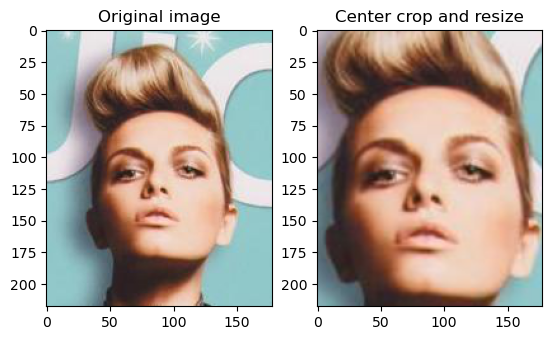

In [92]:
img, att = celeba_dataset[4]
img_center_cropped = transforms.functional.center_crop(img, [0.7*218, 0.7*178])
img_resized = transforms.functional.resize(img_center_cropped, size=(218, 178))

fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[0].set_title('Original image')
axs[1].imshow(img_resized)
axs[1].set_title('Center crop and resize')
plt.show()

##### Transformations for training set:

Here, we will define distinct datasets comprising our training, validation, and test images. In our training set, we will implement a sequence of augmentations, including:
- a <b>random crop</b> (with fixed dimensions),
- a <b>random horizontal flip</b> (with a probability of 0.5), and
- a <b>resizing</b> to 64x64 pixels.

For the validation and test sets, we refrain from applying these augmentations, opting solely for a center crop and resizing to 64x64 pixels.


In [15]:
# Transformation for the training dataset:

transform_train = transforms.Compose([
    transforms.RandomCrop([178, 178]),
    transforms.RandomHorizontalFlip(),
    transforms.Resize([64, 64]),
    transforms.ToTensor()
])

In [16]:
# Transformation for the validation and test datasets:

transform = transforms.Compose([
    transforms.CenterCrop([178, 178]),
    transforms.Resize([64, 64]),
    transforms.ToTensor()
])

In [70]:
# To make 'Wavy_Hair' attribute the target (i.e. attribute 31 in list of 40 attributes), define:
get_attr = lambda attr: attr[33]    

# This will be used in 'target_transform' below when loading the training, validation, and test splits.

In [71]:
celeba_train_dataset = torchvision.datasets.CelebA(image_path, split='train', target_type='attr', download=False, transform=transform_train, target_transform=get_attr)

celeba_valid_dataset = torchvision.datasets.CelebA(image_path, split='valid', target_type='attr', download=False, transform=transform, target_transform=get_attr)

celeba_test_dataset = torchvision.datasets.CelebA(image_path, split='test', target_type='attr', download=False, transform=transform, target_transform=get_attr)

In [72]:
celeba_train_dataset

Dataset CelebA
    Number of datapoints: 162770
    Root location: ./
    Target type: ['attr']
    Split: train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(178, 178), padding=None)
               RandomHorizontalFlip(p=0.5)
               Resize(size=[64, 64], interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )
Target transform: <function <lambda> at 0x000002C5AA457D80>

In [73]:
celeba_valid_dataset

Dataset CelebA
    Number of datapoints: 19867
    Root location: ./
    Target type: ['attr']
    Split: valid
    StandardTransform
Transform: Compose(
               CenterCrop(size=[178, 178])
               Resize(size=[64, 64], interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )
Target transform: <function <lambda> at 0x000002C5AA457D80>

In [74]:
celeba_test_dataset

Dataset CelebA
    Number of datapoints: 19962
    Root location: ./
    Target type: ['attr']
    Split: test
    StandardTransform
Transform: Compose(
               CenterCrop(size=[178, 178])
               Resize(size=[64, 64], interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )
Target transform: <function <lambda> at 0x000002C5AA457D80>

## Create DataLoaders and specify batch size:

Within this notebook, to streamline the training process and minimize the training time, we will exclusively utilize a subset of the data. Specifically, we will employ 16,000 images from the training set and allocate 1,000 images each to both the validation and test sets.

In [75]:
from torch.utils.data import Subset
celeba_train_dataset = Subset(celeba_train_dataset, torch.arange(16000))
celeba_valid_dataset = Subset(celeba_valid_dataset, torch.arange(1000))
celeba_test_dataset = Subset(celeba_test_dataset, torch.arange(1000))


batch_size = 32
torch.manual_seed(1)

train_dl = DataLoader(celeba_train_dataset, batch_size, shuffle=True)
valid_dl = DataLoader(celeba_valid_dataset, batch_size, shuffle=True)
test_dl = DataLoader(celeba_test_dataset, batch_size, shuffle=True)

# Create CNN using nn.Sequential:

In [76]:
model = nn.Sequential(

    nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Dropout(p=0.5),
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Dropout(p=0.5),
    nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.AvgPool2d(kernel_size=8),
    nn.Flatten(),
    nn.Linear(in_features=256, out_features=1),
    nn.Sigmoid()

)

Recall the resizing of each RGB image to 64 x 64 dimensions, resulting in an input dimension for a specific image in a minibatch as $(3, 64, 64)$ in 
\[C,H,W\] format.

Our CNN comprises four convolutions, each succeeded by a ReLU and pooling operation. Two dropout layers are incorporated after the initial two convolutions.

For each convolution, a filter size of $3$ is chosen with same padding, maintaining the height $H$ and width $W$ unchanged. MaxPool2d operations halve the image height and width with each application.

Following these convolutions, the output undergoes flattening and is transmitted through a final linear layer with a sigmoid activation.

The <b>dimensions</b> of the output tensor (for a given image in a minibatch) at each layer are detailed below:

1. <b>Conv2d</b>: 32 filters of size 3x3 (f=3), with 'same' padding (p=1, s=1). 
           Output dimension: (32, 64, 64)

2. <b>ReLU</b>: Activation function. Dimensions unchanged. 
           Output dimension: (32, 64, 64)

3. <b>MaxPool2d</b>: Uses default value of stride = kernel_size. If kernel_size = 2, this halves the image height and width.
           Output dimension: (32, 32, 32)   

4. <b>Dropout</b>: Activations are set to 0 with probability p=0.5. Dimensions unchanged. 
           Output dimension: (32, 32, 32)

5. <b>Conv2d</b>: 64 filters of size 3x3 (f=3), with 'same' padding (p=1, s=1). 
           Output dimension: (64, 32, 32)

6. <b>ReLU</b>: Activation function. Dimensions unchanged. 
           Output dimension: (64, 32, 32)

7. <b>MaxPool2d</b>: Uses default value of stride = kernel_size. If kernel_size = 2, this halves the image height and width.
           Output dimension: (64, 16, 16)

8. <b>Dropout</b>: Activations are set to 0 with probability p=0.5. Dimensions unchanged. 
           Output dimension: (64, 16, 16)

9. <b>Conv2d</b>: 128 filters of size 3x3 (f=3), with 'same' padding (p=1, s=1). 
           Output dimension: (128, 16, 16)

10. <b>ReLU</b>: Activation function. Dimensions unchanged. 
           Output dimension: (128, 16, 16)

11. <b>MaxPool2d</b>: Uses default value of stride = kernel_size. If kernel_size = 2, this halves the image height and width.
           Output dimension: (128, 8, 8)

12. <b>Conv2d</b>: 256 filters of size 3x3 (f=3), with 'same' padding (p=1, s=1). 
           Output dimension: (256, 8, 8)

13. <b>ReLU</b>: Activation function. Dimensions unchanged. 
           Output dimension: (256, 8, 8)

14. <b>AvgPool2d</b>: Uses default value of stride = kernel_size. If kernel_size=8, and H=W=8, we are averaging each 8x8 channel to get a single number. 
           Output dimension: (256, 1, 1)

15. <b>Flatten</b>: Flattens the output tensor from AvgPool2d yielding a 1d tensor of length 256.
           Output dimension: (256)

16. <b>Linear</b>: Single linear transformation layer with one output node. Output single number z.
           Output dimension: (1)

17. <b>Sigmoid</b>: Output activation function sigmoid(z). Output single number in range [0, 1].
           Output dimension: (1)

## Training ConvNet:

In [77]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [78]:
def train(model, num_epochs, train_dl, valid_dl):
    
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    
    for epoch in range(num_epochs):
        
        model.train()
        
        # batch_number = 0
        
        for x_batch, y_batch in train_dl:
            
            #print(f'Batch {batch_number}')
            #batch_number += 1
            
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch.float())
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum()
        
        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)
        
        
        model.eval()
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                
                pred = model(x_batch)[:, 0]
                loss = loss_fn(pred, y_batch.float())
                
                loss_hist_valid[epoch] += loss.item()*y_batch.size(0)
                is_correct = ((pred>=0.5).float() == y_batch).float()
                accuracy_hist_valid[epoch] += is_correct.sum()

        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch] /= len(valid_dl.dataset)
        

        print(f'Time: {datetime.datetime.strftime(datetime.datetime.now(),"%y%m%d%H%M%S")}   Epoch {epoch+1}    Train accuracy: {accuracy_hist_train[epoch]:.4f}      Validation accuracy: {accuracy_hist_valid[epoch]:.4f} \n')

                
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

In [79]:
torch.manual_seed(1)
num_epochs = 30
hist = train(model, num_epochs, train_dl, valid_dl)

Time: 231208132743   Epoch 1    Train accuracy: 0.6823      Validation accuracy: 0.7170 

Time: 231208132904   Epoch 2    Train accuracy: 0.6930      Validation accuracy: 0.7080 

Time: 231208133027   Epoch 3    Train accuracy: 0.7131      Validation accuracy: 0.7040 

Time: 231208133149   Epoch 4    Train accuracy: 0.7216      Validation accuracy: 0.7490 

Time: 231208133316   Epoch 5    Train accuracy: 0.7245      Validation accuracy: 0.7370 

Time: 231208133446   Epoch 6    Train accuracy: 0.7324      Validation accuracy: 0.6920 

Time: 231208133609   Epoch 7    Train accuracy: 0.7352      Validation accuracy: 0.7160 

Time: 231208133731   Epoch 8    Train accuracy: 0.7398      Validation accuracy: 0.7020 

Time: 231208133855   Epoch 9    Train accuracy: 0.7464      Validation accuracy: 0.7630 

Time: 231208134018   Epoch 10    Train accuracy: 0.7491      Validation accuracy: 0.7780 

Time: 231208134141   Epoch 11    Train accuracy: 0.7559      Validation accuracy: 0.7880 

Time: 23

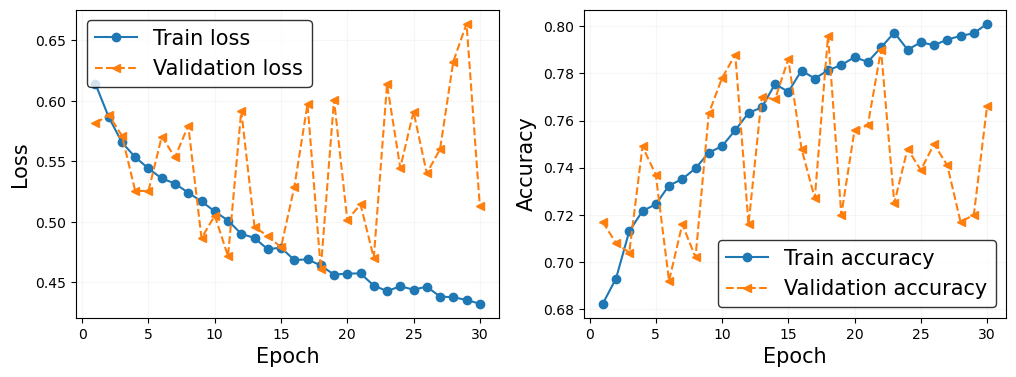

In [80]:
x_arr = np.arange(len(hist[0])) + 1
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '--<', label='Validation loss')
ax.legend(fontsize=15, frameon=True, edgecolor='k')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.grid(alpha=0.1)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-o', label='Train accuracy')
ax.plot(x_arr, hist[3], '--<', label='Validation accuracy')
ax.legend(fontsize=15, frameon=True, edgecolor='k')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
ax.grid(alpha=0.1)
plt.show()

## Evaluate on test data:

In [81]:
accuracy_test = 0
model.eval()
with torch.no_grad():
    for x_batch, y_batch in test_dl:
        
        pred = model(x_batch)[:, 0]
        is_correct = ((pred>=0.5).float() == y_batch).float()
        accuracy_test += is_correct.sum()
        
accuracy_test /= len(test_dl.dataset)

print(f'Test accuracy: {accuracy_test:.4f}')

Test accuracy: 0.7660


Our model has attained an accuracy of $76.60%$ on the test dataset!

Now, let's closely examine certain images from the test dataset, displaying their corresponding Wavy_Hair attributes (labeled as $1$ or $0$), and the probability $P(\textrm{Wavy\_Hair})$ assigned by our model for the presence of wavy hair. It's worth noting that the model predicts the presence of Wavy_Hair if $P(\textrm{Wavy\_Hair}) > 0.5$.

In [101]:
correctclassified = []

for img_idx in range(len(test_dl.dataset)):
    
    img = test_dl.dataset[img_idx][0]   # Test image has dimension (3, 64, 64) (3 channels)
    
    prob = model(img.unsqueeze(0))
    prob = prob.item()
    pred = (prob >= 0.5)
    
    attr = test_dl.dataset[img_idx][1].item()  
    
    correct = int(pred == attr)
    
    if correct == 1:
        correctclassified.append(img_idx)    

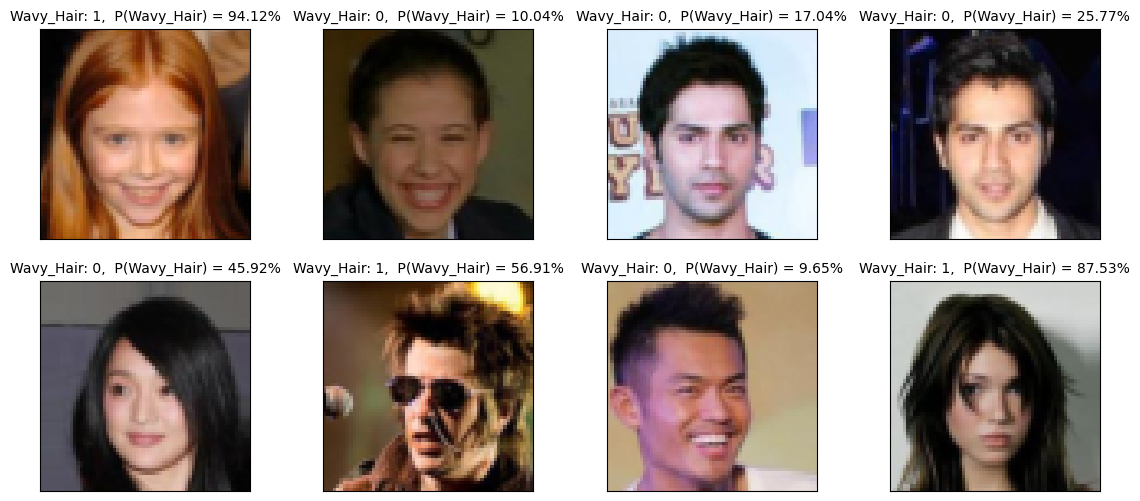

In [103]:
fig, axs = plt.subplots(2, 4, figsize=(14, 6))
img_index = 0

for i in range(2):
    for j in range(4):
        
        # img = celeba_train_dataset[img_index][0]
        img = test_dl.dataset[correctclassified[img_index]][0]
        prob = model(img.unsqueeze(0))
        prob = prob.item()
        # label = celeba_train_dataset[img_index][1].item()
        label = test_dl.dataset[correctclassified[img_index]][1]
                
        axs[i, j].imshow(img.permute(1,2,0))
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        axs[i, j].set_title(f'Wavy_Hair: {label},  P(Wavy_Hair) = {(prob*100):.2f}%', fontsize=10)
        
        img_index += 1
        
plt.show()

Our model accurately classifies all 8 images showcased above. Nonetheless, it would be valuable to scrutinize misclassified images, specifically those labeled as $1$ where we fail to detect wavy hair and those labeled as $0$ where our model identifies wavy hair.

In [98]:
misclassified = []

for img_idx in range(len(test_dl.dataset)):
    
    img = test_dl.dataset[img_idx][0]   # Test image has dimension (3, 64, 64) (3 channels)
    
    prob = model(img.unsqueeze(0))
    prob = prob.item()
    pred = (prob >= 0.5)
    
    attr = test_dl.dataset[img_idx][1].item()  
    
    correct = int(pred == attr)
    
    if correct == 0:
        misclassified.append(img_idx)    

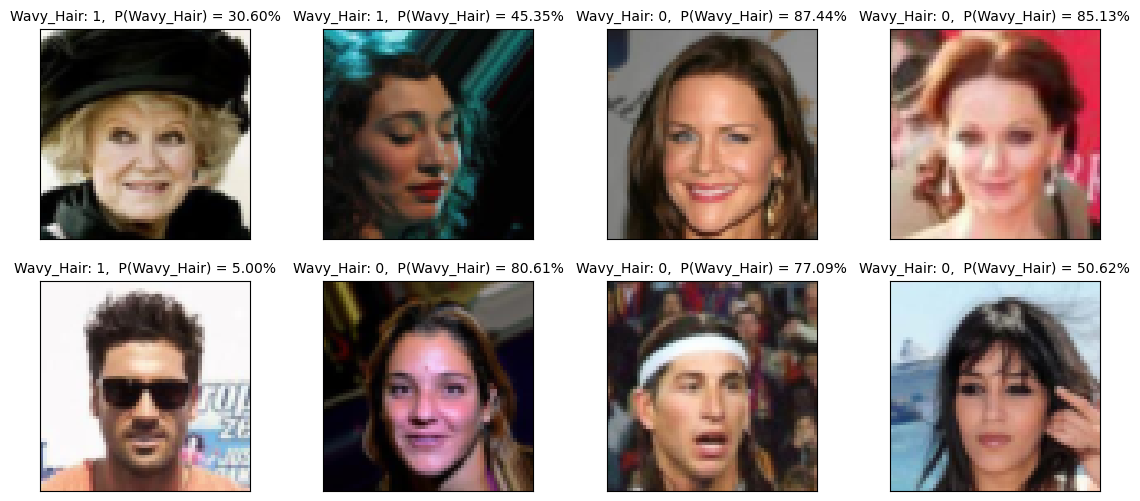

In [100]:
fig, axs = plt.subplots(2, 4, figsize=(14, 6))
img_index = 0

for i in range(2):
    for j in range(4):
        
        img = test_dl.dataset[misclassified[img_index]][0]
        prob = model(img.unsqueeze(0))
        prob = prob.item()
        label = test_dl.dataset[misclassified[img_index]][1].item()
                
        axs[i, j].imshow(img.permute(1,2,0))
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        axs[i, j].set_title(f'Wavy_Hair: {label},  P(Wavy_Hair) = {(prob*100):.2f}%', fontsize=10)
        
        img_index += 1
        
plt.show()


In this set, the images that our model misclassifies appear to be somewhat more ambiguous. For instance, in the first image presented here, our model predicts the presence of wavy hair with a probability of $30.60%$, even though its true label is $1$ (indicating non-wavy hair). The presence of a hat on the person in the image could potentially influence the prediction outcomes.